In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class Node():
    def __init__(self, name, pos):
        self.name = name
        self.pos = pos
        self.neighbor = None

In [5]:
# Generate nodes
NUM_NODES = 5

pos_pairs = set()

while len(pos_pairs) < NUM_NODES:
    x_val = random.random()
    y_val = random.random()
    
    pair = (x_val, y_val)
    
    pos_pairs.add(pair)

nodes = []
start_node, prior_node = None, None

for i, pair in enumerate(pos_pairs):    
    if i == 0:
        newNode = Node(i, pair)
        start_node = newNode
    else:
        newNode = Node(i, pair)
        newNode.neighbor = prior_node

    if i == len(pos_pairs) - 1:
        start_node.neighbor = newNode
    
    prior_node = newNode

In [15]:
curr = start_node
nxt = curr.neighbor

while True:
    print((curr.name, curr.pos))
    
    curr = nxt
    nxt = nxt.neighbor
    
    if curr == start_node: break


(0, (0.42087417737477195, 0.9558837026585507))
(4, (0.8625962165346379, 0.8794142070270746))
(3, (0.5063984284464051, 0.4569380762622468))
(2, (0.2276858864332465, 0.16271690825564789))
(1, (0.18669390754606618, 0.0706707276630626))


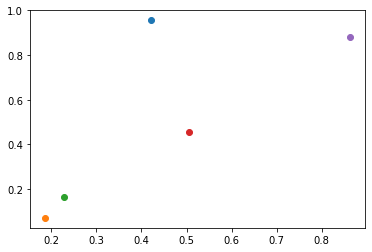

In [6]:
fig = plt.figure(1)

for elem in pos_pairs:
    plt.plot(elem[0], elem[1], 'o')

plt.show()